In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("daily-min-temperatures.csv")  
print(df.head())
data=df['Temp'].values  
scaler=MinMaxScaler()
scaled=scaler.fit_transform(data.reshape(-1,1))
X,y=np.array(X),np.array(y)
X=X.reshape((X.shape[0],X.shape[1],1))

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


In [10]:
model=Sequential([
    LSTM(50,input_shape=(X.shape[1],1)),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history=model.fit(X,y,epochs=10,batch_size=16,verbose=1)
last_seq=scaled[-10:].reshape((1,10,1))
predicted=model.predict(last_seq)
predicted_temp=scaler.inverse_transform(predicted)

Epoch 1/10
228/228 [==============================] - 2s 2ms/step - loss: 0.0165 - mae: 0.0955
Epoch 2/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0109 - mae: 0.0813
Epoch 3/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0105 - mae: 0.0798
Epoch 4/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0101 - mae: 0.0785
Epoch 5/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0097 - mae: 0.0765
Epoch 6/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0093 - mae: 0.0755
Epoch 7/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0090 - mae: 0.0748
Epoch 8/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0090 - mae: 0.0744
Epoch 9/10
228/228 [==============================] - 1s 2ms/step - loss: 0.0088 - mae: 0.0736
Epoch 10/10
1/1 [==============================] - 0s 236ms/step


Next forecasted temperature: 12.268703


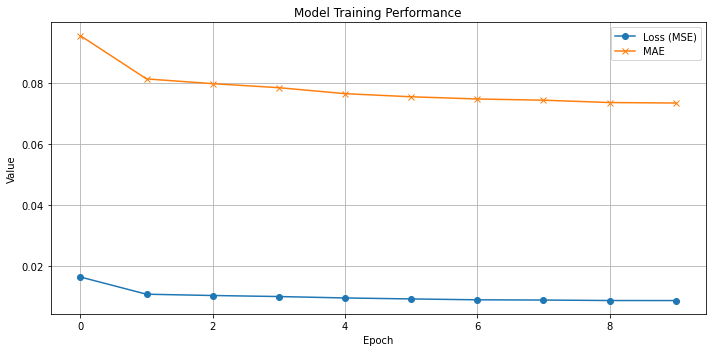

In [11]:
print("Next forecasted temperature:",predicted_temp[0][0])
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (MSE)', marker='o')
plt.plot(history.history['mae'], label='MAE', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Model Training Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()